Found 176 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5334 - loss: 1.0980 - val_accuracy: 0.4091 - val_loss: 0.7027
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5371 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5688 - loss: 0.6768 - val_accuracy: 0.5227 - val_loss: 0.6951
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7163 - loss: 0.6098 - val_accuracy: 0.5455 - val_loss: 0.7019
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8083 - loss: 0.4461 - val_accuracy: 0.5000 - val_loss: 0.7787
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9407 - loss: 0.2992 - val_accuracy: 0.5227 - val_loss: 0.9332
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9673 - loss: 0.1574 - val_accuracy: 0.5227 - val_loss: 1.0267


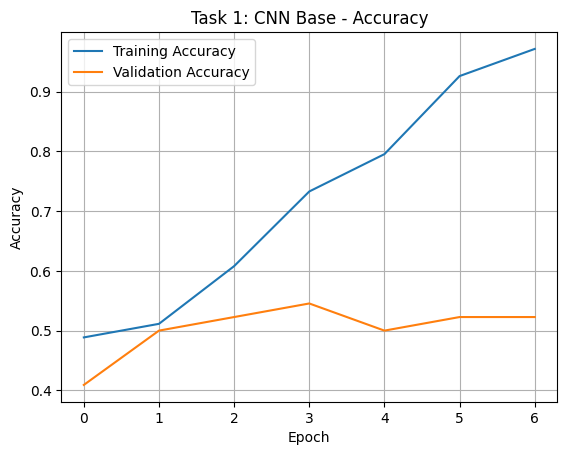

Final Training Accuracy: 0.97
Final Validation Accuracy: 0.52


In [9]:
# 1.自行建構、訓練 CNN 模型，衡量模型預測績效

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# parameter
base_path = "dataset/train"
IMG_SIZE = (128, 128)
BATCH_SIZE = 16
EPOCHS = 20
results = {}

# Baseline：無增強
datagen_base = ImageDataGenerator(rescale=1./255, validation_split=0.2)

def get_generators(datagen):
    train_gen = datagen.flow_from_directory(
        base_path,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )
    val_gen = datagen.flow_from_directory(
        base_path,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
    return train_gen, val_gen

#build simple CNN model
def build_model(version):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D(2,2))

    if version in ['reg', 'full']:
        model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))

    if version in ['reg', 'full']:
        model.add(BatchNormalization())

    model.add(Flatten())
    if version in ['dropout', 'reg', 'full']:
        model.add(Dropout(0.3))

    if version == 'reg':
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    else:
        model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# train and evaluate model
def train_and_plot(model, train_data, val_data, title):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # plot accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # output final result
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_acc:.2f}")
    print(f"Final Validation Accuracy: {final_val_acc:.2f}")
    return history

# Run Task 1
train_gen, val_gen = get_generators(datagen_base)
model_task1 = build_model("base")
history_task1 = train_and_plot(model_task1, train_gen, val_gen, 'Task 1: CNN Base')

Found 176 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5671 - loss: 1.4570 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4439 - loss: 0.6971 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5638 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4893 - loss: 0.6937 - val_accuracy: 0.4545 - val_loss: 0.6949
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.5404 - loss: 0.6917 - val_accuracy: 0.3864 - val_loss: 0.7001
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5624 - loss: 0.6862 - val_accuracy: 0.5682 - val_loss: 0.7133
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5567 - loss: 0.6891 - val_accuracy: 0.4545 - val_loss: 0.6906
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━

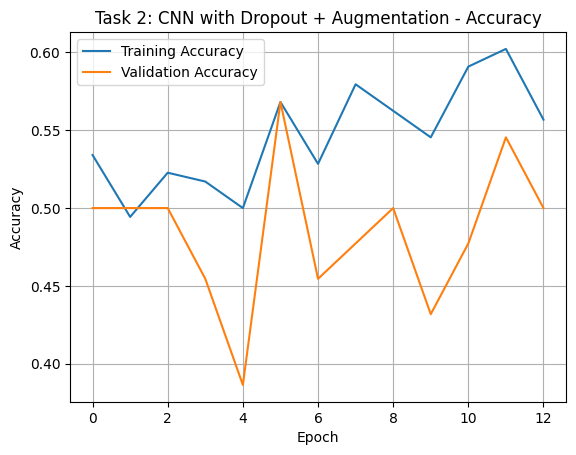

Final Training Accuracy: 0.56
Final Validation Accuracy: 0.50


In [10]:
#2.使用資料增強(data augmentation)技術，觀察可否提升模型預測績效？

# 資料增強版
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
train_gen2, val_gen2 = get_generators(datagen_aug)
model2 = build_model("dropout")
history2 = train_and_plot(model2, train_gen2, val_gen2, "Task 2: CNN with Dropout + Augmentation")

In [11]:
def train_and_evaluate(version, datagen):
    print(f"\n 訓練版本：{version}")
    train_gen, val_gen = get_generators(datagen)
    model = build_model(version)
    early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=[early],
        verbose=1
    )
    results[version] = history
    return model

In [12]:
model_base = train_and_evaluate('base', datagen_base)
model_aug = train_and_evaluate('dropout', datagen_aug)
model_reg = train_and_evaluate('reg', datagen_aug)


 訓練版本：base
Found 176 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4607 - loss: 1.1757 - val_accuracy: 0.5000 - val_loss: 0.7007
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5298 - loss: 0.6858 - val_accuracy: 0.5682 - val_loss: 0.6910
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7182 - loss: 0.6675 - val_accuracy: 0.5682 - val_loss: 0.6866
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8368 - loss: 0.6047 - val_accuracy: 0.5455 - val_loss: 0.7191
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7994 - loss: 0.4782 - val_accuracy: 0.5227 - val_loss: 0.8196
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8657 - loss: 0.3558 - val_accuracy: 0.5455 - val_loss: 1.0222
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8578 - loss: 0.3345 - val_accuracy: 0.5000 - val_loss: 0.8866
Epoch 8/20
11/11 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39511 (\N{CJK UNIFIED IDEOGRAPH-9A57}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35657 (\N{CJK UNIFIED IDEOGRAPH-8B49}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas

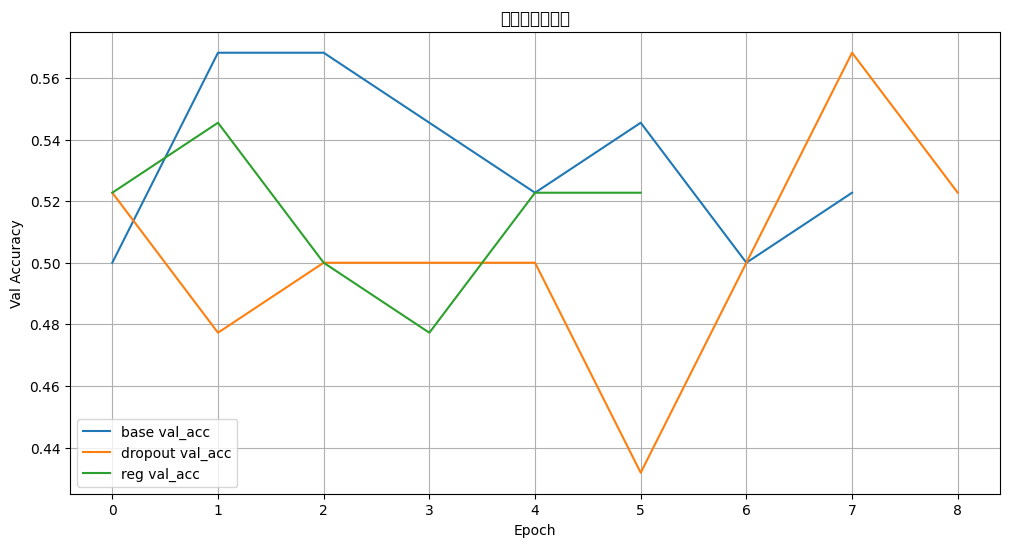

In [13]:
#3
plt.figure(figsize=(12,6))
for key in results:
    plt.plot(results[key].history['val_accuracy'], label=f"{key} val_acc")
plt.title("驗證準確率比較")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Found 176 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.4765 - loss: 0.7161 - val_accuracy: 0.6136 - val_loss: 0.6780
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.5584 - loss: 0.6946 - val_accuracy: 0.5909 - val_loss: 0.6775
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.4843 - loss: 0.7170 - val_accuracy: 0.5909 - val_loss: 0.6770
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.4921 - loss: 0.7113 - val_accuracy: 0.6136 - val_loss: 0.6766
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.4811 - loss: 0.7380 - val_accuracy: 0.5909 - val_loss: 0.6761
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.5367 - loss: 0.6763 - val_accuracy: 0.5909 - val_loss: 0.6757
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.5331 - loss: 0.6989 - val_accuracy: 0.6136 - val_loss: 0.6752
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.4634 - loss: 0.7449 - val_accuracy: 0.6364 - val_loss:

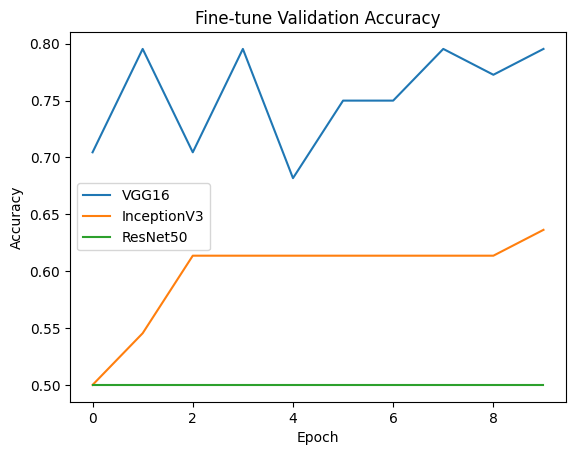

In [16]:
#4.	使用轉移學習(transfer learning)，至少分別使用VGG, Inception-v3, ResNet當基礎模型，再進行微調訓練。請分析使用轉移學習再微調，是否能提升模型預測績效？
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
from tensorflow.keras import layers, models, optimizers

# --- 定義微調函式 ---
def build_and_finetune(base_model, unfreeze_from, lr=1e-4):
    #base_model
    base_model.trainable = False

    # 加頂層
    inputs = layers.Input(shape=IMG_SIZE + (3,))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    # 初次訓練
    train_gen, val_gen = get_generators(datagen_base)

    h1 = model.fit(train_gen, validation_data=val_gen, epochs=10)

    base_model.trainable = True
    for layer in base_model.layers[:unfreeze_from]:
        layer.trainable = False

    model.compile(
        optimizer=optimizers.Adam(lr/10),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    h2 = model.fit(train_gen, validation_data=val_gen, epochs=10)
    return model, h1, h2

# --- 執行 VGG16 / InceptionV3 / ResNet50 微調 ---
# VGG16
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=IMG_SIZE+(3,))
vgg_model, vgg_h1, vgg_h2 = build_and_finetune(vgg_base, unfreeze_from=15)

# InceptionV3
inc_base = InceptionV3(weights='imagenet', include_top=False, input_shape=IMG_SIZE+(3,))
inc_model, inc_h1, inc_h2 = build_and_finetune(inc_base, unfreeze_from=100)

# ResNet50
res_base = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE+(3,))
res_model, res_h1, res_h2 = build_and_finetune(res_base, unfreeze_from=140)

# --- 結果視覺化比較 ---
plt.figure()
plt.plot(vgg_h2.history['val_accuracy'], label='VGG16')
plt.plot(inc_h2.history['val_accuracy'], label='InceptionV3')
plt.plot(res_h2.history['val_accuracy'], label='ResNet50')
plt.title('Fine‑tune Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()